# Trabalho 1: Engenharia de Dados

Neste trabalho irei montar um dataset com alguns dados dos municípios que compõem o Maciço de Baturité extraídos do site do IBGE.

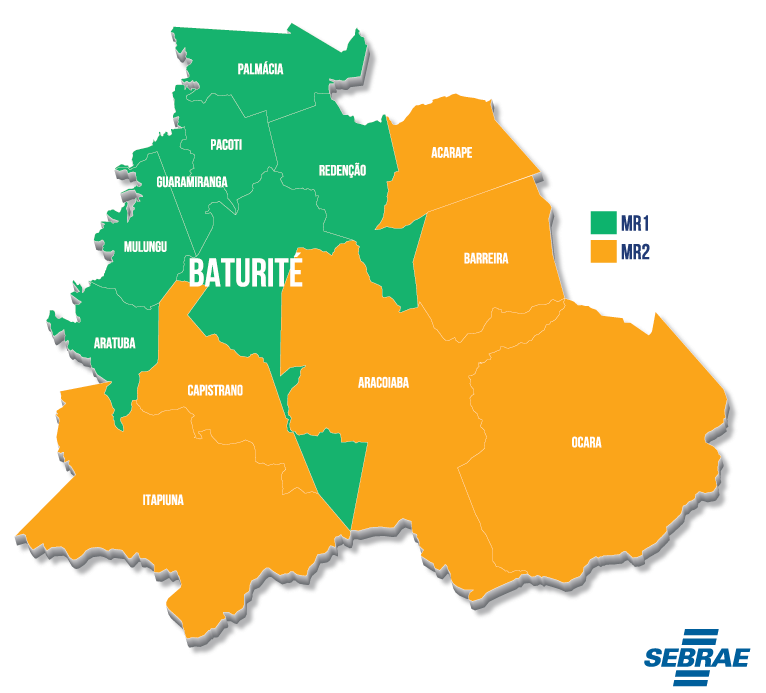

In [3]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

# Ocara

In [4]:
ocara = "https://www.ibge.gov.br/cidades-e-estados/ce/ocara.html"

In [5]:
# Fazendo a requisição da página web por meio da biblioteca requests
requisicao = requests.get(ocara) 

In [6]:
print(requisicao) # Se a requisição funcionar, ela retornará o número 200

<Response [200]>


In [7]:
# Parsear o HTML da página com a biblioteca BeautifulSoup
site_ocara = BeautifulSoup(requisicao.text, 'html.parser') 

In [8]:
type(site_ocara)

bs4.BeautifulSoup

In [9]:
# Mostrando o HTML organizado
print(site_ocara.prettify())

﻿
<!DOCTYPE HTML>
<html lang="pt-BR">
 <head>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <!-- Global site tag (gtag.js) - Google Analytics -->
  <link crossorigin="crossorigin" href="https://www.googletagmanager.com" rel="preconnect"/>
  <script async="" src="https://www.googletagmanager.com/gtag/js?id=UA-285486-1">
  </script>
  <script>
   window.dataLayer = window.dataLayer || [];
    function gtag(){dataLayer.push(arguments);}
    gtag('js', new Date());

    gtag('config', 'UA-285486-1');
    
            gtag('config', 'UA-285486-76', {'groups':'ibgelabs'});
  </script>
  <!-- Fim de Google Analytics -->
  <!-- Google Tag Manager -->
  <script>
   (function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
'https://www.googletagmanager.com/gtm.js?id='

In [10]:
variaveis = site_ocara.find_all("p")
variaveis

[<p class="erro-servico-label">Nossos serviços estão apresentando instabilidade no momento. Algumas informações podem não estar disponíveis.</p>,
 <p class="ver-mais"><a class="botao link-cidades" href="//cidades.ibge.gov.br/brasil/ce/ocara" rel="noopener" target="_blank">Saiba mais no portal Cidades@</a></p>,
 <p class="codigo">Código: 2309458</p>,
 <p><b>Baixar:</b></p>,
 <p>Prefeito</p>,
 <p class="ind-value">AMALIA LOPES DE SOUSA<small>   [2021]</small></p>,
 <p>Gentílico</p>,
 <p class="ind-value">ocarense</p>,
 <p>Área Territorial</p>,
 <p class="ind-value">763,075 <span class="indicador-unidade">km²</span><small>   [2022]</small></p>,
 <p>População estimada</p>,
 <p class="ind-value">25.958 <span class="indicador-unidade">pessoas</span><small>   [2021]</small></p>,
 <p>Densidade demográfica</p>,
 <p class="ind-value">31,36 <span class="indicador-unidade">hab/km²</span><small>   [2010]</small></p>,
 <p>Escolarização <span>6 a 14 anos</span></p>,
 <p class="ind-value">98,2 <span c

In [11]:
variaveis = site_ocara.find_all("p", {'class':"ind-value"})
variaveis

[<p class="ind-value">AMALIA LOPES DE SOUSA<small>   [2021]</small></p>,
 <p class="ind-value">ocarense</p>,
 <p class="ind-value">763,075 <span class="indicador-unidade">km²</span><small>   [2022]</small></p>,
 <p class="ind-value">25.958 <span class="indicador-unidade">pessoas</span><small>   [2021]</small></p>,
 <p class="ind-value">31,36 <span class="indicador-unidade">hab/km²</span><small>   [2010]</small></p>,
 <p class="ind-value">98,2 <span class="indicador-unidade">%</span><small>   [2010]</small></p>,
 <p class="ind-value">0,594<small>   [2010]</small></p>,
 <p class="ind-value">10,95 <span class="indicador-unidade">óbitos por mil nascidos vivos</span><small>   [2020]</small></p>,
 <p class="ind-value">60.494,66 <span class="indicador-unidade">R$ (×1000)</span><small>   [2017]</small></p>,
 <p class="ind-value">53.834,80 <span class="indicador-unidade">R$ (×1000)</span><small>   [2017]</small></p>,
 <p class="ind-value">8.912,68 <span class="indicador-unidade">R$</span><small

In [12]:
len(variaveis)

11

In [13]:
df_ocara = pd.DataFrame[]

SyntaxError: invalid syntax (2494588231.py, line 1)

In [15]:
var = pd.DataFrame(variaveis.text)

AttributeError: ResultSet object has no attribute 'text'. You're probably treating a list of elements like a single element. Did you call find_all() when you meant to call find()?

In [14]:
for var in variaveis:
    print(var.text)

AMALIA LOPES DE SOUSA   [2021]
ocarense
763,075 km²   [2022]
25.958 pessoas   [2021]
31,36 hab/km²   [2010]
98,2 %   [2010]
0,594   [2010]
10,95 óbitos por mil nascidos vivos   [2020]
60.494,66 R$ (×1000)   [2017]
53.834,80 R$ (×1000)   [2017]
8.912,68 R$   [2020]


In [31]:
prefeito_ocara = variaveis[0].contents[0]
prefeito_ocara

'AMALIA LOPES DE SOUSA'

In [52]:
colunas = ['Prefeito', "Gentílico", 'Área Territorial em km²', 'População estimada', 'Densidade demográfica', 'Escolarização', 'Analfabetismo', 'Mortalidade infantil', 'Receitas realizadas', 'Despesas empenhadas', 'PIB per capita']
df = pd.DataFrame(columns = colunas)
df

,Prefeito,Gentílico,Área Territorial Km,População estimada,Densidade demográfica,Escolarização,IDHM,Mortalidade infantil,Receitas realizadas,Despesas empenhadas,PIB per capita


In [53]:
dados_ocara = []
for i in range(len(variaveis)):
    dados_ocara.append(variaveis[i].contents[0])

In [54]:
dados_ocara

['AMALIA LOPES DE SOUSA',
 'ocarense',
 '763,075 ',
 '25.958 ',
 '31,36 ',
 '98,2 ',
 '0,594',
 '10,95 ',
 '60.494,66 ',
 '53.834,80 ',
 '8.912,68 ']

In [73]:
df.loc[0] = dados_ocara
df

,Prefeito,Gentílico,Área Territorial Km,População estimada,Densidade demográfica,Escolarização,IDHM,Mortalidade infantil,Receitas realizadas,Despesas empenhadas,PIB per capita
0,AMALIA LOPES DE SOUSA,ocarense,"763,075",25.958,"31,36","98,2","0,594","10,95","60.494,66","53.834,80","8.912,68"
1,HERBERLH FREITAS REIS CAVALCANTE MOTA,baturiteense,"314,075",36.127,"107,98","95,9","0,619","16,39","74.220,67","67.628,89","11.616,09"


# Baturité

In [57]:
baturite = "https://www.ibge.gov.br/cidades-e-estados/ce/baturite.html"

In [58]:
# Fazendo a requisição da página web por meio da biblioteca requests
requisicao2 = requests.get(baturite) 

In [59]:
print(requisicao)

<Response [200]>


In [60]:
site_baturite = BeautifulSoup(requisicao2.text, 'html.parser') 

In [61]:
# Mostrando o HTML organizado
print(site_baturite.prettify())

﻿
<!DOCTYPE HTML>
<html lang="pt-BR">
 <head>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <!-- Global site tag (gtag.js) - Google Analytics -->
  <link crossorigin="crossorigin" href="https://www.googletagmanager.com" rel="preconnect"/>
  <script async="" src="https://www.googletagmanager.com/gtag/js?id=UA-285486-1">
  </script>
  <script>
   window.dataLayer = window.dataLayer || [];
    function gtag(){dataLayer.push(arguments);}
    gtag('js', new Date());

    gtag('config', 'UA-285486-1');
    
            gtag('config', 'UA-285486-76', {'groups':'ibgelabs'});
  </script>
  <!-- Fim de Google Analytics -->
  <!-- Google Tag Manager -->
  <script>
   (function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
'https://www.googletagmanager.com/gtm.js?id='

In [64]:
variaveis2 = site_baturite.find_all("p")
variaveis2

[<p class="erro-servico-label">Nossos serviços estão apresentando instabilidade no momento. Algumas informações podem não estar disponíveis.</p>,
 <p class="ver-mais"><a class="botao link-cidades" href="//cidades.ibge.gov.br/brasil/ce/baturite" rel="noopener" target="_blank">Saiba mais no portal Cidades@</a></p>,
 <p class="codigo">Código: 2302107</p>,
 <p><b>Baixar:</b></p>,
 <p>Prefeito</p>,
 <p class="ind-value">HERBERLH FREITAS REIS CAVALCANTE MOTA<small>   [2021]</small></p>,
 <p>Gentílico</p>,
 <p class="ind-value">baturiteense</p>,
 <p>Área Territorial</p>,
 <p class="ind-value">314,075 <span class="indicador-unidade">km²</span><small>   [2022]</small></p>,
 <p>População estimada</p>,
 <p class="ind-value">36.127 <span class="indicador-unidade">pessoas</span><small>   [2021]</small></p>,
 <p>Densidade demográfica</p>,
 <p class="ind-value">107,98 <span class="indicador-unidade">hab/km²</span><small>   [2010]</small></p>,
 <p>Escolarização <span>6 a 14 anos</span></p>,
 <p class=

In [67]:
variaveis2 = site_baturite.find_all("p", {'class':"ind-value"})
variaveis2

[<p class="ind-value">HERBERLH FREITAS REIS CAVALCANTE MOTA<small>   [2021]</small></p>,
 <p class="ind-value">baturiteense</p>,
 <p class="ind-value">314,075 <span class="indicador-unidade">km²</span><small>   [2022]</small></p>,
 <p class="ind-value">36.127 <span class="indicador-unidade">pessoas</span><small>   [2021]</small></p>,
 <p class="ind-value">107,98 <span class="indicador-unidade">hab/km²</span><small>   [2010]</small></p>,
 <p class="ind-value">95,9 <span class="indicador-unidade">%</span><small>   [2010]</small></p>,
 <p class="ind-value">0,619<small>   [2010]</small></p>,
 <p class="ind-value">16,39 <span class="indicador-unidade">óbitos por mil nascidos vivos</span><small>   [2020]</small></p>,
 <p class="ind-value">74.220,67 <span class="indicador-unidade">R$ (×1000)</span><small>   [2017]</small></p>,
 <p class="ind-value">67.628,89 <span class="indicador-unidade">R$ (×1000)</span><small>   [2017]</small></p>,
 <p class="ind-value">11.616,09 <span class="indicador-un

In [68]:
for var in variaveis2:
    print(var.text)

HERBERLH FREITAS REIS CAVALCANTE MOTA   [2021]
baturiteense
314,075 km²   [2022]
36.127 pessoas   [2021]
107,98 hab/km²   [2010]
95,9 %   [2010]
0,619   [2010]
16,39 óbitos por mil nascidos vivos   [2020]
74.220,67 R$ (×1000)   [2017]
67.628,89 R$ (×1000)   [2017]
11.616,09 R$   [2020]


In [69]:
dados_baturite = []
for i in range(len(variaveis2)):
    dados_baturite.append(variaveis2[i].contents[0])

In [70]:
dados_baturite

['HERBERLH FREITAS REIS CAVALCANTE MOTA',
 'baturiteense',
 '314,075 ',
 '36.127 ',
 '107,98 ',
 '95,9 ',
 '0,619',
 '16,39 ',
 '74.220,67 ',
 '67.628,89 ',
 '11.616,09 ']

In [72]:
df.loc[1] = dados_baturite
df

,Prefeito,Gentílico,Área Territorial Km,População estimada,Densidade demográfica,Escolarização,IDHM,Mortalidade infantil,Receitas realizadas,Despesas empenhadas,PIB per capita
0,HERBERLH FREITAS REIS CAVALCANTE MOTA,baturiteense,"314,075",36.127,"107,98","95,9","0,619","16,39","74.220,67","67.628,89","11.616,09"
1,HERBERLH FREITAS REIS CAVALCANTE MOTA,baturiteense,"314,075",36.127,"107,98","95,9","0,619","16,39","74.220,67","67.628,89","11.616,09"


# Capistrano


In [34]:
capistrano = "https://www.ibge.gov.br/cidades-e-estados/ce/capistrano.html"

In [35]:
# Fazendo a requisição da página web por meio da biblioteca requests
requisicao3 = requests.get(capistrano) 

In [36]:
print(requisicao3)

<Response [200]>


In [37]:
site_capistrano = BeautifulSoup(requisicao3.text, 'html.parser') 

In [38]:
# Mostrando o HTML organizado
print(site_capistrano.prettify())

﻿
<!DOCTYPE HTML>
<html lang="pt-BR">
 <head>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <!-- Global site tag (gtag.js) - Google Analytics -->
  <link crossorigin="crossorigin" href="https://www.googletagmanager.com" rel="preconnect"/>
  <script async="" src="https://www.googletagmanager.com/gtag/js?id=UA-285486-1">
  </script>
  <script>
   window.dataLayer = window.dataLayer || [];
    function gtag(){dataLayer.push(arguments);}
    gtag('js', new Date());

    gtag('config', 'UA-285486-1');
    
            gtag('config', 'UA-285486-76', {'groups':'ibgelabs'});
  </script>
  <!-- Fim de Google Analytics -->
  <!-- Google Tag Manager -->
  <script>
   (function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
'https://www.googletagmanager.com/gtm.js?id='

In [40]:
variaveis3 = site_capistrano.find_all("p", {'class':"ind-value"})
variaveis3

[<p class="ind-value">ANTONIO SOARES SARAIVA JUNIOR<small>   [2021]</small></p>,
 <p class="ind-value">capistranense</p>,
 <p class="ind-value">226,549 <span class="indicador-unidade">km²</span><small>   [2022]</small></p>,
 <p class="ind-value">17.830 <span class="indicador-unidade">pessoas</span><small>   [2021]</small></p>,
 <p class="ind-value">76,67 <span class="indicador-unidade">hab/km²</span><small>   [2010]</small></p>,
 <p class="ind-value">96,3 <span class="indicador-unidade">%</span><small>   [2010]</small></p>,
 <p class="ind-value">0,611<small>   [2010]</small></p>,
 <p class="ind-value">12,05 <span class="indicador-unidade">óbitos por mil nascidos vivos</span><small>   [2020]</small></p>,
 <p class="ind-value">44.410,43 <span class="indicador-unidade">R$ (×1000)</span><small>   [2017]</small></p>,
 <p class="ind-value">47.389,12 <span class="indicador-unidade">R$ (×1000)</span><small>   [2017]</small></p>,
 <p class="ind-value">10.611,27 <span class="indicador-unidade">R

In [41]:
for var in variaveis3:
    print(var.text)

ANTONIO SOARES SARAIVA JUNIOR   [2021]
capistranense
226,549 km²   [2022]
17.830 pessoas   [2021]
76,67 hab/km²   [2010]
96,3 %   [2010]
0,611   [2010]
12,05 óbitos por mil nascidos vivos   [2020]
44.410,43 R$ (×1000)   [2017]
47.389,12 R$ (×1000)   [2017]
10.611,27 R$   [2020]


In [42]:
len(variaveis3)

11

# Guaramiranga

In [43]:
guaramiranga = "https://www.ibge.gov.br/cidades-e-estados/ce/guaramiranga.html"

In [44]:
# Fazendo a requisição da página web por meio da biblioteca requests
requisicao4 = requests.get(guaramiranga) 

In [45]:
print(requisicao4)

<Response [200]>


In [46]:
site_guaramiranga = BeautifulSoup(requisicao4.text, 'html.parser') 

In [47]:
# Mostrando o HTML organizado
print(site_guaramiranga.prettify())

﻿
<!DOCTYPE HTML>
<html lang="pt-BR">
 <head>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <!-- Global site tag (gtag.js) - Google Analytics -->
  <link crossorigin="crossorigin" href="https://www.googletagmanager.com" rel="preconnect"/>
  <script async="" src="https://www.googletagmanager.com/gtag/js?id=UA-285486-1">
  </script>
  <script>
   window.dataLayer = window.dataLayer || [];
    function gtag(){dataLayer.push(arguments);}
    gtag('js', new Date());

    gtag('config', 'UA-285486-1');
    
            gtag('config', 'UA-285486-76', {'groups':'ibgelabs'});
  </script>
  <!-- Fim de Google Analytics -->
  <!-- Google Tag Manager -->
  <script>
   (function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
'https://www.googletagmanager.com/gtm.js?id='

In [57]:
variaveis4 = site_guaramiranga.find_all("p", {'class':"ind-value"})
variaveis4

[<p class="ind-value">ROBERLANDIA FERREIRA CASTELO BRANCO<small>   [2021]</small></p>,
 <p class="ind-value">guaramiranguense</p>,
 <p class="ind-value">90,817 <span class="indicador-unidade">km²</span><small>   [2022]</small></p>,
 <p class="ind-value">5.073 <span class="indicador-unidade">pessoas</span><small>   [2021]</small></p>,
 <p class="ind-value">70,06 <span class="indicador-unidade">hab/km²</span><small>   [2010]</small></p>,
 <p class="ind-value">97,6 <span class="indicador-unidade">%</span><small>   [2010]</small></p>,
 <p class="ind-value">0,637<small>   [2010]</small></p>,
 <p class="ind-value">-<small>   [2020]</small></p>,
 <p class="ind-value">32.183,19 <span class="indicador-unidade">R$ (×1000)</span><small>   [2017]</small></p>,
 <p class="ind-value">20.840,77 <span class="indicador-unidade">R$ (×1000)</span><small>   [2017]</small></p>,
 <p class="ind-value">14.182,54 <span class="indicador-unidade">R$</span><small>   [2020]</small></p>]

In [58]:
for var in variaveis4:
    print(var.text)

ROBERLANDIA FERREIRA CASTELO BRANCO   [2021]
guaramiranguense
90,817 km²   [2022]
5.073 pessoas   [2021]
70,06 hab/km²   [2010]
97,6 %   [2010]
0,637   [2010]
-   [2020]
32.183,19 R$ (×1000)   [2017]
20.840,77 R$ (×1000)   [2017]
14.182,54 R$   [2020]


# Redenção

In [48]:
redencao = "https://www.ibge.gov.br/cidades-e-estados/ce/redencao.html"

In [49]:
# Fazendo a requisição da página web por meio da biblioteca requests
requisicao5 = requests.get(redencao) 

In [50]:
print(requisicao5)

<Response [200]>


In [51]:
site_redencao = BeautifulSoup(requisicao5.text, 'html.parser')

In [52]:
# Mostrando o HTML organizado
print(site_redencao.prettify())

﻿
<!DOCTYPE HTML>
<html lang="pt-BR">
 <head>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <!-- Global site tag (gtag.js) - Google Analytics -->
  <link crossorigin="crossorigin" href="https://www.googletagmanager.com" rel="preconnect"/>
  <script async="" src="https://www.googletagmanager.com/gtag/js?id=UA-285486-1">
  </script>
  <script>
   window.dataLayer = window.dataLayer || [];
    function gtag(){dataLayer.push(arguments);}
    gtag('js', new Date());

    gtag('config', 'UA-285486-1');
    
            gtag('config', 'UA-285486-76', {'groups':'ibgelabs'});
  </script>
  <!-- Fim de Google Analytics -->
  <!-- Google Tag Manager -->
  <script>
   (function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
'https://www.googletagmanager.com/gtm.js?id='

In [55]:
variaveis5 = site_redencao.find_all("p", {'class':"ind-value"})
variaveis5

[<p class="ind-value">DAVID SANTA CRUZ BENEVIDES<small>   [2021]</small></p>,
 <p class="ind-value">redencionista</p>,
 <p class="ind-value">247,989 <span class="indicador-unidade">km²</span><small>   [2022]</small></p>,
 <p class="ind-value">29.238 <span class="indicador-unidade">pessoas</span><small>   [2021]</small></p>,
 <p class="ind-value">117,24 <span class="indicador-unidade">hab/km²</span><small>   [2010]</small></p>,
 <p class="ind-value">98,1 <span class="indicador-unidade">%</span><small>   [2010]</small></p>,
 <p class="ind-value">0,626<small>   [2010]</small></p>,
 <p class="ind-value">9,07 <span class="indicador-unidade">óbitos por mil nascidos vivos</span><small>   [2020]</small></p>,
 <p class="ind-value">71.514,40 <span class="indicador-unidade">R$ (×1000)</span><small>   [2017]</small></p>,
 <p class="ind-value">60.338,75 <span class="indicador-unidade">R$ (×1000)</span><small>   [2017]</small></p>,
 <p class="ind-value">13.216,42 <span class="indicador-unidade">R$</

In [56]:
for var in variaveis5:
    print(var.text)

DAVID SANTA CRUZ BENEVIDES   [2021]
redencionista
247,989 km²   [2022]
29.238 pessoas   [2021]
117,24 hab/km²   [2010]
98,1 %   [2010]
0,626   [2010]
9,07 óbitos por mil nascidos vivos   [2020]
71.514,40 R$ (×1000)   [2017]
60.338,75 R$ (×1000)   [2017]
13.216,42 R$   [2020]


# Mulungu

In [59]:
mulungu = "https://www.ibge.gov.br/cidades-e-estados/ce/mulungu.html"

In [62]:
# Fazendo a requisição da página web por meio da biblioteca requests
requisicao6 = requests.get(mulungu)

In [63]:
print(requisicao6)

<Response [200]>


In [64]:
site_mulungu = BeautifulSoup(requisicao6.text, 'html.parser')

In [65]:
# Mostrando o HTML organizado
print(site_mulungu.prettify())

﻿
<!DOCTYPE HTML>
<html lang="pt-BR">
 <head>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <!-- Global site tag (gtag.js) - Google Analytics -->
  <link crossorigin="crossorigin" href="https://www.googletagmanager.com" rel="preconnect"/>
  <script async="" src="https://www.googletagmanager.com/gtag/js?id=UA-285486-1">
  </script>
  <script>
   window.dataLayer = window.dataLayer || [];
    function gtag(){dataLayer.push(arguments);}
    gtag('js', new Date());

    gtag('config', 'UA-285486-1');
    
            gtag('config', 'UA-285486-76', {'groups':'ibgelabs'});
  </script>
  <!-- Fim de Google Analytics -->
  <!-- Google Tag Manager -->
  <script>
   (function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
'https://www.googletagmanager.com/gtm.js?id='

In [66]:
variaveis6 = site_mulungu.find_all("p", {'class':"ind-value"})
variaveis6

[<p class="ind-value">ROBERT VIANA LEITÃO<small>   [2021]</small></p>,
 <p class="ind-value">mulunguense</p>,
 <p class="ind-value">97,951 <span class="indicador-unidade">km²</span><small>   [2022]</small></p>,
 <p class="ind-value">11.056 <span class="indicador-unidade">pessoas</span><small>   [2021]</small></p>,
 <p class="ind-value">85,35 <span class="indicador-unidade">hab/km²</span><small>   [2010]</small></p>,
 <p class="ind-value">96,9 <span class="indicador-unidade">%</span><small>   [2010]</small></p>,
 <p class="ind-value">0,607<small>   [2010]</small></p>,
 <p class="ind-value">7,04 <span class="indicador-unidade">óbitos por mil nascidos vivos</span><small>   [2020]</small></p>,
 <p class="ind-value">34.670,52 <span class="indicador-unidade">R$ (×1000)</span><small>   [2017]</small></p>,
 <p class="ind-value">26.115,93 <span class="indicador-unidade">R$ (×1000)</span><small>   [2017]</small></p>,
 <p class="ind-value">11.284,98 <span class="indicador-unidade">R$</span><small

In [67]:
for var in variaveis6:
    print(var.text)

ROBERT VIANA LEITÃO   [2021]
mulunguense
97,951 km²   [2022]
11.056 pessoas   [2021]
85,35 hab/km²   [2010]
96,9 %   [2010]
0,607   [2010]
7,04 óbitos por mil nascidos vivos   [2020]
34.670,52 R$ (×1000)   [2017]
26.115,93 R$ (×1000)   [2017]
11.284,98 R$   [2020]


# Pacoti

In [68]:
pacoti = "https://www.ibge.gov.br/cidades-e-estados/ce/pacoti.html"

In [69]:
# Fazendo a requisição da página web por meio da biblioteca requests
requisicao7 = requests.get(pacoti)

In [70]:
print(requisicao7)

<Response [200]>


In [71]:
site_pacoti = BeautifulSoup(requisicao7.text, 'html.parser')

In [72]:
# Mostrando o HTML organizado
print(site_pacoti.prettify())

﻿
<!DOCTYPE HTML>
<html lang="pt-BR">
 <head>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <!-- Global site tag (gtag.js) - Google Analytics -->
  <link crossorigin="crossorigin" href="https://www.googletagmanager.com" rel="preconnect"/>
  <script async="" src="https://www.googletagmanager.com/gtag/js?id=UA-285486-1">
  </script>
  <script>
   window.dataLayer = window.dataLayer || [];
    function gtag(){dataLayer.push(arguments);}
    gtag('js', new Date());

    gtag('config', 'UA-285486-1');
    
            gtag('config', 'UA-285486-76', {'groups':'ibgelabs'});
  </script>
  <!-- Fim de Google Analytics -->
  <!-- Google Tag Manager -->
  <script>
   (function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
'https://www.googletagmanager.com/gtm.js?id='

In [73]:
variaveis7 = site_pacoti.find_all("p", {'class':"ind-value"})
variaveis7

[<p class="ind-value">MARCOS VENICIOS NORJOSA GONZAGA<small>   [2021]</small></p>,
 <p class="ind-value">pacotiense</p>,
 <p class="ind-value">112,433 <span class="indicador-unidade">km²</span><small>   [2022]</small></p>,
 <p class="ind-value">12.313 <span class="indicador-unidade">pessoas</span><small>   [2021]</small></p>,
 <p class="ind-value">103,61 <span class="indicador-unidade">hab/km²</span><small>   [2010]</small></p>,
 <p class="ind-value">96,5 <span class="indicador-unidade">%</span><small>   [2010]</small></p>,
 <p class="ind-value">0,635<small>   [2010]</small></p>,
 <p class="ind-value">24,79 <span class="indicador-unidade">óbitos por mil nascidos vivos</span><small>   [2020]</small></p>,
 <p class="ind-value">33.058,45 <span class="indicador-unidade">R$ (×1000)</span><small>   [2017]</small></p>,
 <p class="ind-value">30.571,84 <span class="indicador-unidade">R$ (×1000)</span><small>   [2017]</small></p>,
 <p class="ind-value">11.105,20 <span class="indicador-unidade">R

In [74]:
for var in variaveis7:
    print(var.text)

MARCOS VENICIOS NORJOSA GONZAGA   [2021]
pacotiense
112,433 km²   [2022]
12.313 pessoas   [2021]
103,61 hab/km²   [2010]
96,5 %   [2010]
0,635   [2010]
24,79 óbitos por mil nascidos vivos   [2020]
33.058,45 R$ (×1000)   [2017]
30.571,84 R$ (×1000)   [2017]
11.105,20 R$   [2020]


In [75]:
len(variaveis7)

11

# Palmácia

In [76]:
palmacia = "https://www.ibge.gov.br/cidades-e-estados/ce/palmacia.html"

In [77]:
# Fazendo a requisição da página web por meio da biblioteca requests
requisicao8 = requests.get(palmacia)

In [78]:
print(requisicao8)

<Response [200]>


In [79]:
site_palmacia = BeautifulSoup(requisicao8.text, 'html.parser')

In [80]:
# Mostrando o HTML organizado
print(site_palmacia.prettify())

﻿
<!DOCTYPE HTML>
<html lang="pt-BR">
 <head>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <!-- Global site tag (gtag.js) - Google Analytics -->
  <link crossorigin="crossorigin" href="https://www.googletagmanager.com" rel="preconnect"/>
  <script async="" src="https://www.googletagmanager.com/gtag/js?id=UA-285486-1">
  </script>
  <script>
   window.dataLayer = window.dataLayer || [];
    function gtag(){dataLayer.push(arguments);}
    gtag('js', new Date());

    gtag('config', 'UA-285486-1');
    
            gtag('config', 'UA-285486-76', {'groups':'ibgelabs'});
  </script>
  <!-- Fim de Google Analytics -->
  <!-- Google Tag Manager -->
  <script>
   (function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
'https://www.googletagmanager.com/gtm.js?id='

In [81]:
variaveis8 = site_palmacia.find_all("p", {'class':"ind-value"})
variaveis8

[<p class="ind-value">DAVID CAMPOS MARTINS<small>   [2021]</small></p>,
 <p class="ind-value">palmaciano</p>,
 <p class="ind-value">128,896 <span class="indicador-unidade">km²</span><small>   [2022]</small></p>,
 <p class="ind-value">13.553 <span class="indicador-unidade">pessoas</span><small>   [2021]</small></p>,
 <p class="ind-value">101,90 <span class="indicador-unidade">hab/km²</span><small>   [2010]</small></p>,
 <p class="ind-value">91,7 <span class="indicador-unidade">%</span><small>   [2010]</small></p>,
 <p class="ind-value">0,622<small>   [2010]</small></p>,
 <p class="ind-value">-<small>   [2020]</small></p>,
 <p class="ind-value">22,16 <span class="indicador-unidade">R$ (×1000)</span><small>   [2017]</small></p>,
 <p class="ind-value">23.779,59 <span class="indicador-unidade">R$ (×1000)</span><small>   [2017]</small></p>,
 <p class="ind-value">8.725,16 <span class="indicador-unidade">R$</span><small>   [2020]</small></p>]

In [82]:
for var in variaveis8:
    print(var.text)

DAVID CAMPOS MARTINS   [2021]
palmaciano
128,896 km²   [2022]
13.553 pessoas   [2021]
101,90 hab/km²   [2010]
91,7 %   [2010]
0,622   [2010]
-   [2020]
22,16 R$ (×1000)   [2017]
23.779,59 R$ (×1000)   [2017]
8.725,16 R$   [2020]


In [83]:
len(variaveis8)

11

# Barreira

In [84]:
barreira = "https://www.ibge.gov.br/cidades-e-estados/ce/barreira.html"

In [85]:
# Fazendo a requisição da página web por meio da biblioteca requests
requisicao9 = requests.get(barreira)

In [86]:
print(requisicao9)

<Response [200]>


In [87]:
site_barreira = BeautifulSoup(requisicao9.text, 'html.parser')

In [88]:
# Mostrando o HTML organizado
print(site_barreira.prettify())

﻿
<!DOCTYPE HTML>
<html lang="pt-BR">
 <head>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <!-- Global site tag (gtag.js) - Google Analytics -->
  <link crossorigin="crossorigin" href="https://www.googletagmanager.com" rel="preconnect"/>
  <script async="" src="https://www.googletagmanager.com/gtag/js?id=UA-285486-1">
  </script>
  <script>
   window.dataLayer = window.dataLayer || [];
    function gtag(){dataLayer.push(arguments);}
    gtag('js', new Date());

    gtag('config', 'UA-285486-1');
    
            gtag('config', 'UA-285486-76', {'groups':'ibgelabs'});
  </script>
  <!-- Fim de Google Analytics -->
  <!-- Google Tag Manager -->
  <script>
   (function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
'https://www.googletagmanager.com/gtm.js?id='

In [89]:
variaveis9 = site_barreira.find_all("p", {'class':"ind-value"})
variaveis9

[<p class="ind-value">ANTONIO ALAILSON OLIVEIRA SALDANHA<small>   [2017]</small></p>,
 <p class="ind-value">barreirense</p>,
 <p class="ind-value">260,003 <span class="indicador-unidade">km²</span><small>   [2022]</small></p>,
 <p class="ind-value">22.715 <span class="indicador-unidade">pessoas</span><small>   [2021]</small></p>,
 <p class="ind-value">79,63 <span class="indicador-unidade">hab/km²</span><small>   [2010]</small></p>,
 <p class="ind-value">97,8 <span class="indicador-unidade">%</span><small>   [2010]</small></p>,
 <p class="ind-value">0,616<small>   [2010]</small></p>,
 <p class="ind-value">25,28 <span class="indicador-unidade">óbitos por mil nascidos vivos</span><small>   [2020]</small></p>,
 <p class="ind-value">49.562,61 <span class="indicador-unidade">R$ (×1000)</span><small>   [2017]</small></p>,
 <p class="ind-value">44.585,47 <span class="indicador-unidade">R$ (×1000)</span><small>   [2017]</small></p>,
 <p class="ind-value">9.089,71 <span class="indicador-unidade"

In [90]:
for var in variaveis9:
    print(var.text)

ANTONIO ALAILSON OLIVEIRA SALDANHA   [2017]
barreirense
260,003 km²   [2022]
22.715 pessoas   [2021]
79,63 hab/km²   [2010]
97,8 %   [2010]
0,616   [2010]
25,28 óbitos por mil nascidos vivos   [2020]
49.562,61 R$ (×1000)   [2017]
44.585,47 R$ (×1000)   [2017]
9.089,71 R$   [2020]


In [91]:
len(variaveis9)

11

# Itapiúna

In [92]:
itapiuna = "https://www.ibge.gov.br/cidades-e-estados/ce/itapiuna.html"

In [93]:
# Fazendo a requisição da página web por meio da biblioteca requests
requisicao10 = requests.get(itapiuna)

In [94]:
print(requisicao10)

<Response [200]>


In [95]:
site_itapiuna = BeautifulSoup(requisicao10.text, 'html.parser')

In [96]:
# Mostrando o HTML organizado
print(site_itapiuna.prettify())

﻿
<!DOCTYPE HTML>
<html lang="pt-BR">
 <head>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <!-- Global site tag (gtag.js) - Google Analytics -->
  <link crossorigin="crossorigin" href="https://www.googletagmanager.com" rel="preconnect"/>
  <script async="" src="https://www.googletagmanager.com/gtag/js?id=UA-285486-1">
  </script>
  <script>
   window.dataLayer = window.dataLayer || [];
    function gtag(){dataLayer.push(arguments);}
    gtag('js', new Date());

    gtag('config', 'UA-285486-1');
    
            gtag('config', 'UA-285486-76', {'groups':'ibgelabs'});
  </script>
  <!-- Fim de Google Analytics -->
  <!-- Google Tag Manager -->
  <script>
   (function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
'https://www.googletagmanager.com/gtm.js?id='

In [97]:
variaveis10 = site_itapiuna.find_all("p", {'class':"ind-value"})
variaveis10

[<p class="ind-value">FRANCISCO DÁRIO DE OLIVEIRA COELHO<small>   [2021]</small></p>,
 <p class="ind-value">itapiunense</p>,
 <p class="ind-value">593,231 <span class="indicador-unidade">km²</span><small>   [2022]</small></p>,
 <p class="ind-value">20.653 <span class="indicador-unidade">pessoas</span><small>   [2021]</small></p>,
 <p class="ind-value">31,64 <span class="indicador-unidade">hab/km²</span><small>   [2010]</small></p>,
 <p class="ind-value">95,3 <span class="indicador-unidade">%</span><small>   [2010]</small></p>,
 <p class="ind-value">0,604<small>   [2010]</small></p>,
 <p class="ind-value">4,93 <span class="indicador-unidade">óbitos por mil nascidos vivos</span><small>   [2020]</small></p>,
 <p class="ind-value">65.456,74 <span class="indicador-unidade">R$ (×1000)</span><small>   [2017]</small></p>,
 <p class="ind-value">45.448,28 <span class="indicador-unidade">R$ (×1000)</span><small>   [2017]</small></p>,
 <p class="ind-value">7.944,20 <span class="indicador-unidade">

In [98]:
for var in variaveis10:
    print(var.text)

FRANCISCO DÁRIO DE OLIVEIRA COELHO   [2021]
itapiunense
593,231 km²   [2022]
20.653 pessoas   [2021]
31,64 hab/km²   [2010]
95,3 %   [2010]
0,604   [2010]
4,93 óbitos por mil nascidos vivos   [2020]
65.456,74 R$ (×1000)   [2017]
45.448,28 R$ (×1000)   [2017]
7.944,20 R$   [2020]


# Aratuba

In [108]:
aratuba = "https://www.ibge.gov.br/cidades-e-estados/ce/aratuba.html"

In [109]:
# Fazendo a requisição da página web por meio da biblioteca requests
requisicao11 = requests.get(aratuba)

In [110]:
print(requisicao11)

<Response [200]>


In [111]:
site_aratuba = BeautifulSoup(requisicao11.text, 'html.parser')

In [105]:
# Mostrando o HTML organizado
print(site_aratuba.prettify())

﻿
<!DOCTYPE HTML>
<html lang="pt-BR">
 <head>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <!-- Global site tag (gtag.js) - Google Analytics -->
  <link crossorigin="crossorigin" href="https://www.googletagmanager.com" rel="preconnect"/>
  <script async="" src="https://www.googletagmanager.com/gtag/js?id=UA-285486-1">
  </script>
  <script>
   window.dataLayer = window.dataLayer || [];
    function gtag(){dataLayer.push(arguments);}
    gtag('js', new Date());

    gtag('config', 'UA-285486-1');
    
            gtag('config', 'UA-285486-76', {'groups':'ibgelabs'});
  </script>
  <!-- Fim de Google Analytics -->
  <!-- Google Tag Manager -->
  <script>
   (function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
'https://www.googletagmanager.com/gtm.js?id='

In [112]:
variaveis11 = site_aratuba.find_all("p", {'class':"ind-value"})
variaveis11

[<p class="ind-value">JOERLY RODRIGUES VICTOR<small>   [2021]</small></p>,
 <p class="ind-value">aratubano</p>,
 <p class="ind-value">119,758 <span class="indicador-unidade">km²</span><small>   [2022]</small></p>,
 <p class="ind-value">11.759 <span class="indicador-unidade">pessoas</span><small>   [2021]</small></p>,
 <p class="ind-value">100,44 <span class="indicador-unidade">hab/km²</span><small>   [2010]</small></p>,
 <p class="ind-value">97 <span class="indicador-unidade">%</span><small>   [2010]</small></p>,
 <p class="ind-value">0,622<small>   [2010]</small></p>,
 <p class="ind-value">13,51 <span class="indicador-unidade">óbitos por mil nascidos vivos</span><small>   [2020]</small></p>,
 <p class="ind-value">49.123,73 <span class="indicador-unidade">R$ (×1000)</span><small>   [2017]</small></p>,
 <p class="ind-value">31.633,96 <span class="indicador-unidade">R$ (×1000)</span><small>   [2017]</small></p>,
 <p class="ind-value">13.301,76 <span class="indicador-unidade">R$</span><sm

In [113]:
for var in variaveis11:
    print(var.text)

JOERLY RODRIGUES VICTOR   [2021]
aratubano
119,758 km²   [2022]
11.759 pessoas   [2021]
100,44 hab/km²   [2010]
97 %   [2010]
0,622   [2010]
13,51 óbitos por mil nascidos vivos   [2020]
49.123,73 R$ (×1000)   [2017]
31.633,96 R$ (×1000)   [2017]
13.301,76 R$   [2020]


# Acarape

In [114]:
acarape = "https://www.ibge.gov.br/cidades-e-estados/ce/acarape.html"

In [115]:
# Fazendo a requisição da página web por meio da biblioteca requests
requisicao12 = requests.get(acarape)

In [116]:
print(requisicao12)

<Response [200]>


In [117]:
site_acarape = BeautifulSoup(requisicao12.text, 'html.parser')

In [118]:
# Mostrando o HTML organizado
print(site_acarape.prettify())

﻿
<!DOCTYPE HTML>
<html lang="pt-BR">
 <head>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <!-- Global site tag (gtag.js) - Google Analytics -->
  <link crossorigin="crossorigin" href="https://www.googletagmanager.com" rel="preconnect"/>
  <script async="" src="https://www.googletagmanager.com/gtag/js?id=UA-285486-1">
  </script>
  <script>
   window.dataLayer = window.dataLayer || [];
    function gtag(){dataLayer.push(arguments);}
    gtag('js', new Date());

    gtag('config', 'UA-285486-1');
    
            gtag('config', 'UA-285486-76', {'groups':'ibgelabs'});
  </script>
  <!-- Fim de Google Analytics -->
  <!-- Google Tag Manager -->
  <script>
   (function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
'https://www.googletagmanager.com/gtm.js?id='

In [119]:
variaveis12 = site_acarape.find_all("p", {'class':"ind-value"})
variaveis12

[<p class="ind-value">FRANCISCO EDILBERTO BESERRA BARROSO<small>   [2021]</small></p>,
 <p class="ind-value">acarapense</p>,
 <p class="ind-value">130,002 <span class="indicador-unidade">km²</span><small>   [2022]</small></p>,
 <p class="ind-value">15.140 <span class="indicador-unidade">pessoas</span><small>   [2021]</small></p>,
 <p class="ind-value">98,52 <span class="indicador-unidade">hab/km²</span><small>   [2010]</small></p>,
 <p class="ind-value">96,8 <span class="indicador-unidade">%</span><small>   [2010]</small></p>,
 <p class="ind-value">0,606<small>   [2010]</small></p>,
 <p class="ind-value">5,35 <span class="indicador-unidade">óbitos por mil nascidos vivos</span><small>   [2020]</small></p>,
 <p class="ind-value">38.762,54 <span class="indicador-unidade">R$ (×1000)</span><small>   [2017]</small></p>,
 <p class="ind-value">36.800,47 <span class="indicador-unidade">R$ (×1000)</span><small>   [2017]</small></p>,
 <p class="ind-value">10.317,47 <span class="indicador-unidade"

In [120]:
for var in variaveis12:
    print(var.text)

FRANCISCO EDILBERTO BESERRA BARROSO   [2021]
acarapense
130,002 km²   [2022]
15.140 pessoas   [2021]
98,52 hab/km²   [2010]
96,8 %   [2010]
0,606   [2010]
5,35 óbitos por mil nascidos vivos   [2020]
38.762,54 R$ (×1000)   [2017]
36.800,47 R$ (×1000)   [2017]
10.317,47 R$   [2020]


# Aracoiaba

In [121]:
aracoiaba = "https://www.ibge.gov.br/cidades-e-estados/ce/aracoiaba.html"

In [122]:
# Fazendo a requisição da página web por meio da biblioteca requests
requisicao13 = requests.get(aracoiaba)

In [123]:
print(requisicao13)

<Response [200]>


In [124]:
site_aracoiaba = BeautifulSoup(requisicao13.text, 'html.parser')

In [125]:
# Mostrando o HTML organizado
print(site_acarape.prettify())

﻿
<!DOCTYPE HTML>
<html lang="pt-BR">
 <head>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <!-- Global site tag (gtag.js) - Google Analytics -->
  <link crossorigin="crossorigin" href="https://www.googletagmanager.com" rel="preconnect"/>
  <script async="" src="https://www.googletagmanager.com/gtag/js?id=UA-285486-1">
  </script>
  <script>
   window.dataLayer = window.dataLayer || [];
    function gtag(){dataLayer.push(arguments);}
    gtag('js', new Date());

    gtag('config', 'UA-285486-1');
    
            gtag('config', 'UA-285486-76', {'groups':'ibgelabs'});
  </script>
  <!-- Fim de Google Analytics -->
  <!-- Google Tag Manager -->
  <script>
   (function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
'https://www.googletagmanager.com/gtm.js?id='

In [127]:
variaveis13 = site_aracoiaba.find_all("p", {'class':"ind-value"})
variaveis13

[<p class="ind-value">THIAGO CAMPELO NOGUEIRA<small>   [2021]</small></p>,
 <p class="ind-value">aracoiabense</p>,
 <p class="ind-value">643,988 <span class="indicador-unidade">km²</span><small>   [2022]</small></p>,
 <p class="ind-value">26.600 <span class="indicador-unidade">pessoas</span><small>   [2021]</small></p>,
 <p class="ind-value">38,67 <span class="indicador-unidade">hab/km²</span><small>   [2010]</small></p>,
 <p class="ind-value">96,5 <span class="indicador-unidade">%</span><small>   [2010]</small></p>,
 <p class="ind-value">0,615<small>   [2010]</small></p>,
 <p class="ind-value">8,7 <span class="indicador-unidade">óbitos por mil nascidos vivos</span><small>   [2020]</small></p>,
 <p class="ind-value">66.969,90 <span class="indicador-unidade">R$ (×1000)</span><small>   [2017]</small></p>,
 <p class="ind-value">70.353,86 <span class="indicador-unidade">R$ (×1000)</span><small>   [2017]</small></p>,
 <p class="ind-value">9.885,68 <span class="indicador-unidade">R$</span><s

In [129]:
for var in variaveis13:
    print(var.text)

THIAGO CAMPELO NOGUEIRA   [2021]
aracoiabense
643,988 km²   [2022]
26.600 pessoas   [2021]
38,67 hab/km²   [2010]
96,5 %   [2010]
0,615   [2010]
8,7 óbitos por mil nascidos vivos   [2020]
66.969,90 R$ (×1000)   [2017]
70.353,86 R$ (×1000)   [2017]
9.885,68 R$   [2020]
